Processing bench4.txt
Processing bench1.txt
Processing bench0.txt
Processing bench2.txt
Processing bench3.txt


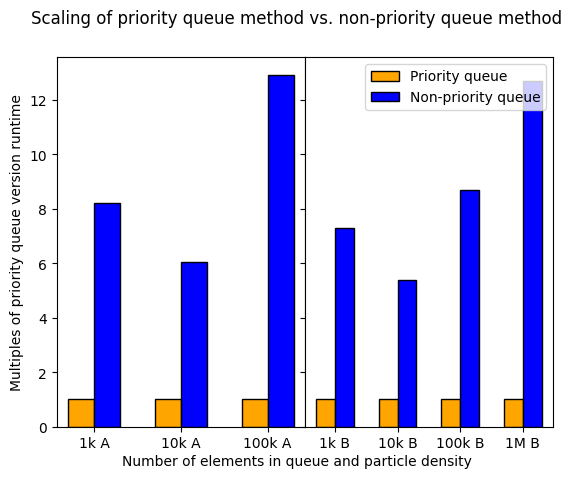

In [3]:
from bench_data_extractor import load_data, averages, RunSetup
import matplotlib.pyplot as plt
import numpy as np

data_files = load_data()
data_average = averages(data_files)
del data_files


filtered = {key: value for key, value in data_average.items() if key.ring == 'A'}

x = np.arange(2)
width = 0.25
multiplier = 0


def format_num(num):
    match num:
        case 1_000: return '1k'
        case 10_000: return '10k'
        case 100_000: return '100k'
        case 1_000_000: return '1M'
        case _: return str(num)


data_out = {}
for ring in ('A', 'B'):
    for size in (1_000, 10_000, 100_000, 1_000_000):
        if ring == 'A' and size == 1_000_000:
            continue

        key_pq = RunSetup(ring, True, size)
        key_npq = RunSetup(ring, False, size)

        data_out[(ring, size)] = (1, data_average[key_npq] / data_average[key_pq])

fig = plt.figure()
gs = fig.add_gridspec(1, 2, wspace=0)
(ax1, ax2) = gs.subplots(sharey=True)

for ring, ax in (('A', ax1), ('B', ax2)):
    ax.bar([f'{format_num(key[1])} {key[0]}' for key in data_out if key[0] == ring], [value[0] for key, value in data_out.items() if key[0] == ring], width=-0.3, align='edge', color='orange', edgecolor='black')
    ax.bar([f'{format_num(key[1])} {key[0]}' for key in data_out if key[0] == ring], [value[1] for key, value in data_out.items() if key[0] == ring], width=0.3, align='edge', color='b', edgecolor='black')

fig.suptitle('Scaling of priority queue method vs. non-priority queue method')
ax1.set_ylabel('Multiples of priority queue version runtime')

fig.legend(['Priority queue', 'Non-priority queue'], loc='upper right', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), bbox_transform=ax2.transAxes)

fig.text(0.5, 0.03, 'Number of elements in queue and particle density', ha='center')

# plt.bar([f'{key.size} {key.pq}' for key in data_out], data_out.values())
for ax in fig.get_axes():
    ax.label_outer()


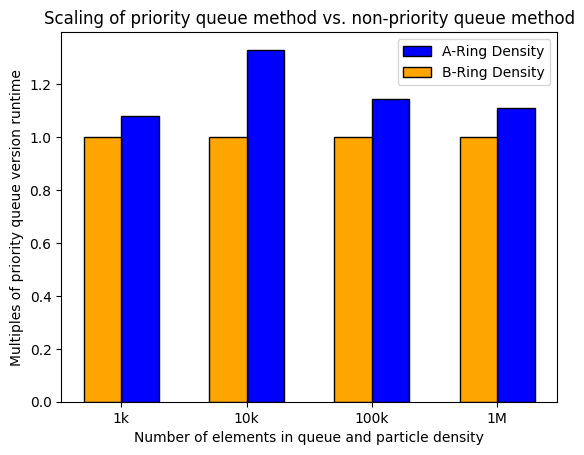

In [4]:
fig, ax = plt.subplots()

filtered = {key: value for key, value in data_average.items() if key.pq}

filtered_B = {key.size: value for key, value in filtered.items() if key.ring == 'B'}
filtered_A = {key.size: value / filtered_B[key.size] for key, value in filtered.items() if key.ring == 'A'}

filtered_B = {key: 1 for key, value in filtered_B.items()}


ax.bar([f'{format_num(key)}' for key in filtered_A], filtered_A.values(), width=0.3, align='edge', color='b', edgecolor='black')
ax.bar([f'{format_num(key)}' for key in filtered_B], filtered_B.values(), width=-0.3, align='edge', color='orange', edgecolor='black')

ax.set_title('Scaling of priority queue method vs. non-priority queue method')
ax.set_ylabel('Multiples of priority queue version runtime')
ax.set_xlabel('Number of elements in queue and particle density')


ax.legend(['A-Ring Density', 'B-Ring Density'])

